# Fruit classification project


Use Deep Learning and this dataset to predict kind of fruit as the given
image. This project should follow the guideline as:

1. Perform data exploration (group images, do clustering
analysis for images, display images for analysis, etc.).
2. Use CNN with classification_report to do prediction.
4. Tune the models if necessary.
5. Use separate test set images to verify model accuracy.

In [39]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
import time
from sklearn.datasets import load_files
from tensorflow.keras.models import load_model

In [2]:
# tf.__version__

In [3]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# 1. Data Preprocessing

### Generating images for the Training set and Test set

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'D:/machine learning/project/assignment 8/fruits-360/Training',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('D:/machine learning/project/assignment 8/fruits-360/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 22688 images belonging to 131 classes.


### Visualizing the Data

In [6]:
training_data = pd.DataFrame(training_set.classes, columns=['classes'])
testing_data = pd.DataFrame(test_set.classes, columns=['classes'])

In [7]:
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [8]:
x1, y1 = create_stack_bar_data('classes', training_data)
x1 = list(training_set.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Class Count")
layout = dict(height=400, width=1200, title='Class Distribution in Training Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Class Count'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [9]:
x1, y1 = create_stack_bar_data('classes', testing_data)
x1 = list(test_set.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Class Count")
layout = dict(height=400, width=1100, title='Class Distribution in Test Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Class Count'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

### Display image samples of the Data Train

In [10]:
# random sample of train images
x_train = training_set[100][0]
y_train = training_set[100][1]

In [11]:
labels = list(training_set.class_indices)

In [12]:
value_train = []
for i in range(len(y_train)):
    value_train.append(np.argmax(y_train[i]))  
label_train = []
for i in value_train:
    label_train.append(labels[i])     

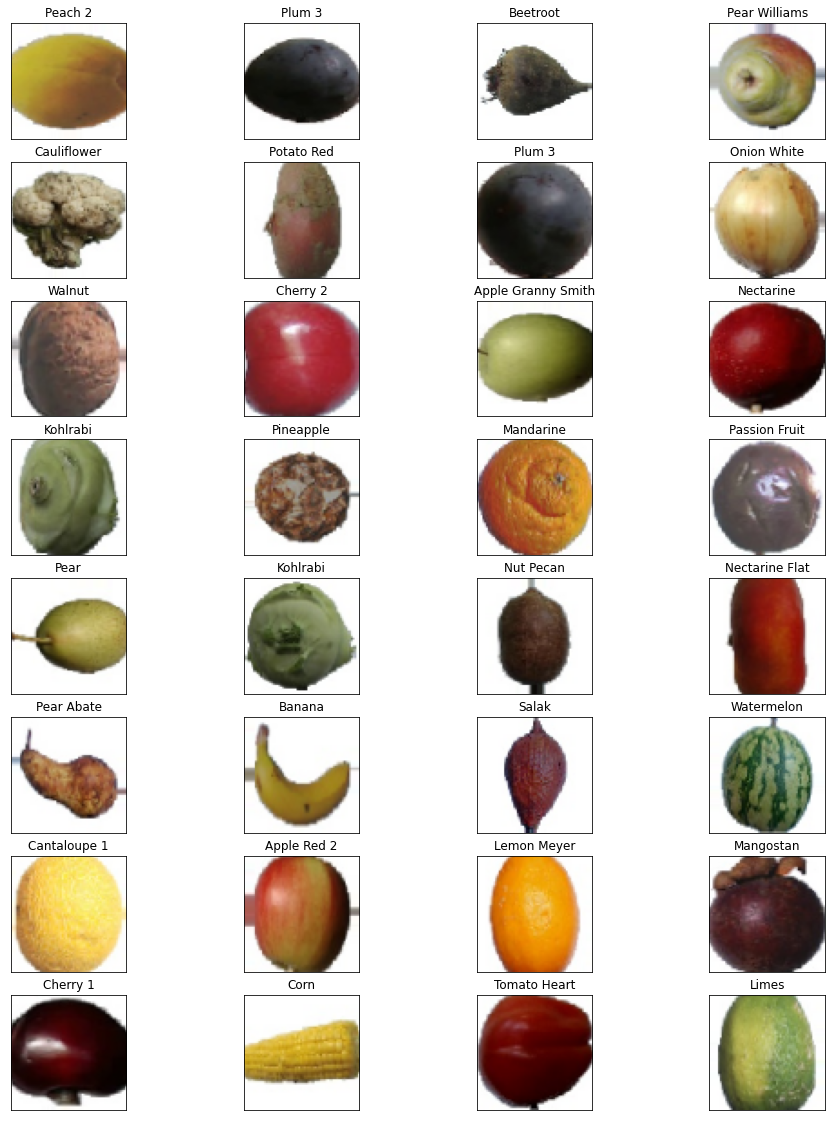

In [13]:
# visualize training image samples!
fig = plt.figure(figsize =(16,20))
for i in range(len(x_train)):
    ax = fig.add_subplot(8,4,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(label_train[i]))  

# 2. Build Model

## 2.1 Initialising the CNN

In [14]:
# Initialising the CNN
cnn = Sequential()

In [15]:
# Step 1 - Convolution
cnn.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))

In [16]:
# Step 2 - Pooling
cnn.add(MaxPool2D(2,2))

In [17]:
# Adding convolutional layers
cnn.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
cnn.add(MaxPool2D(pool_size = (2, 2)))

In [18]:
# Step 3 - Flattening
cnn.add(Flatten())

In [19]:
# Step 4 - Full Connection
cnn.add(Dense(128,activation='relu'))

In [20]:
# Step 5 - Output Layer
cnn.add(Dense(131,activation='softmax')) 

In [21]:
# Step 6 - Compile
# cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 2.2 Training the CNN on the Training set and evaluating it on the Test set

In [22]:
cnn.fit(training_set,
                  steps_per_epoch = 67692,
                  epochs = 5,
                  validation_data = test_set,
                  validation_steps = 12000)

Epoch 1/5
67692/67692 [==============================] - 3135s 46ms/step - loss: 0.0564 - accuracy: 0.9836 - val_loss: 0.1349 - val_accuracy: 0.9798
Epoch 2/5
67692/67692 [==============================] - 2994s 44ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.2354 - val_accuracy: 0.9777
Epoch 3/5
67692/67692 [==============================] - 2807s 41ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.4920 - val_accuracy: 0.9868
Epoch 4/5
67692/67692 [==============================] - 2829s 42ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 2.1272e-04 - val_accuracy: 0.9769
Epoch 5/5
67692/67692 [==============================] - 2868s 42ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1377 - val_accuracy: 0.9810


## 2.3 Predict

In [23]:
# random sample of test images
x_test = test_set[120][0]
y_test = test_set[120][1]

In [24]:
labels = list(test_set.class_indices)

In [25]:
result_true = []
for i in range(len(y_test)):
    result_true.append(np.argmax(y_test[i]))  

In [26]:
y_pred = cnn.predict(x_test)

In [27]:
result_pred = []
for i in range(len(y_pred)):
    result_pred.append(np.argmax(y_pred[i]))  

In [28]:
label_true = []
label_pred = []
for i in result_true:
    label_true.append(labels[i])
for i in result_pred:
    label_pred.append(labels[i])    

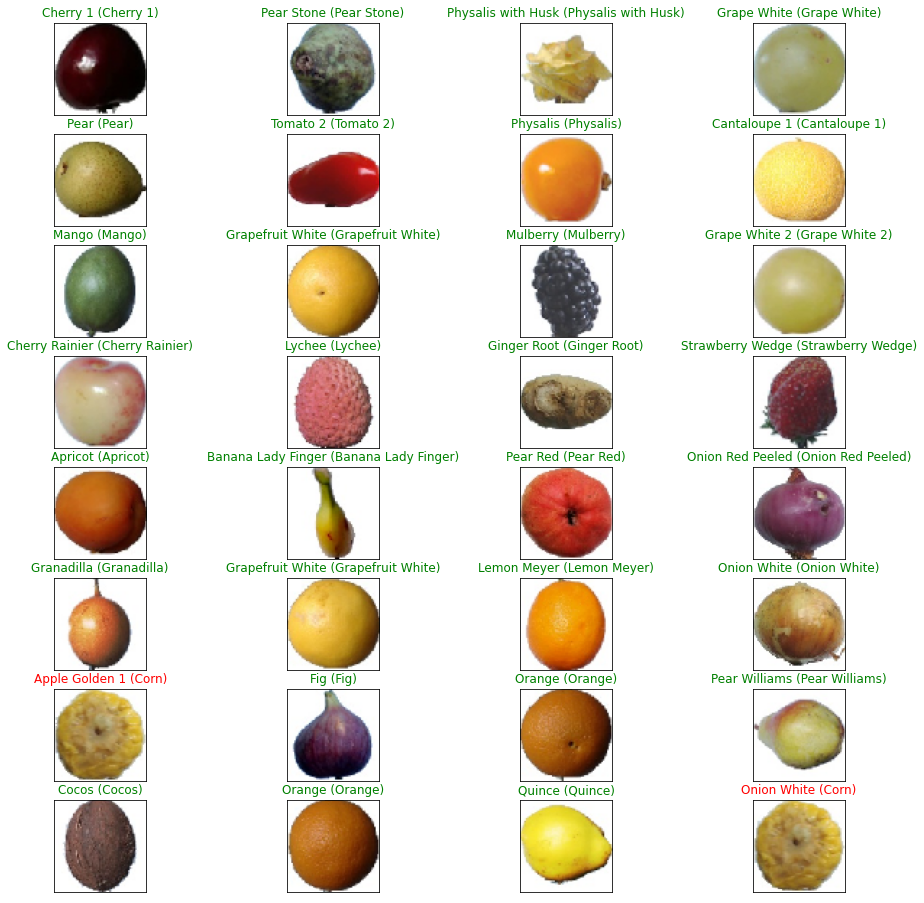

In [29]:
fig = plt.figure(figsize=(16, 16))
for i in range(len(x_test)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))
    ax.set_title("{} ({})".format(label_pred[i], label_true[i]),
                 color=("green" if label_pred[i] == label_true[i] else "red"))  

In [30]:
# evaluate and print test accuracy
score = cnn.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9375


## 2.4. Tune Model

### Initialising the CNN

In [31]:
cnn2 = Sequential()

In [32]:
cnn2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
cnn2.add(MaxPool2D(2,2))
cnn2.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
cnn2.add(MaxPool2D(pool_size = (2, 2)))
cnn2.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
cnn2.add(MaxPool2D(pool_size = (2, 2)))
# cnn2.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
# cnn2.add(MaxPool2D(pool_size = (2, 2)))
cnn2.add(Flatten())
cnn2.add(Dense(128,activation='relu'))
cnn2.add(Dense(131,activation='softmax'))
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN

In [33]:
cnn2.fit(training_set,
                  steps_per_epoch = 67692,
                  epochs = 5,
                  validation_data = test_set,
                  validation_steps = 12000)

Epoch 1/5
67692/67692 [==============================] - 3245s 48ms/step - loss: 7.1323e-04 - accuracy: 0.9998 - val_loss: 6.3594e-04 - val_accuracy: 0.9997
Epoch 2/5
67692/67692 [==============================] - 3104s 46ms/step - loss: 9.7809e-05 - accuracy: 1.0000 - val_loss: 3.2875e-06 - val_accuracy: 0.9999
Epoch 3/5
67692/67692 [==============================] - 2950s 44ms/step - loss: 6.3238e-05 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9998
Epoch 4/5
67692/67692 [==============================] - 3094s 46ms/step - loss: 4.9679e-05 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9998
Epoch 5/5
67692/67692 [==============================] - 3454s 51ms/step - loss: 4.8033e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9998


### Predict 

In [34]:
y_pred = cnn2.predict(x_test)

In [35]:
result_pred = []
for i in range(len(y_pred)):
    result_pred.append(np.argmax(y_pred[i]))  

In [36]:
label_pred= []
for i in result_pred:
    label_pred.append(labels[i])    

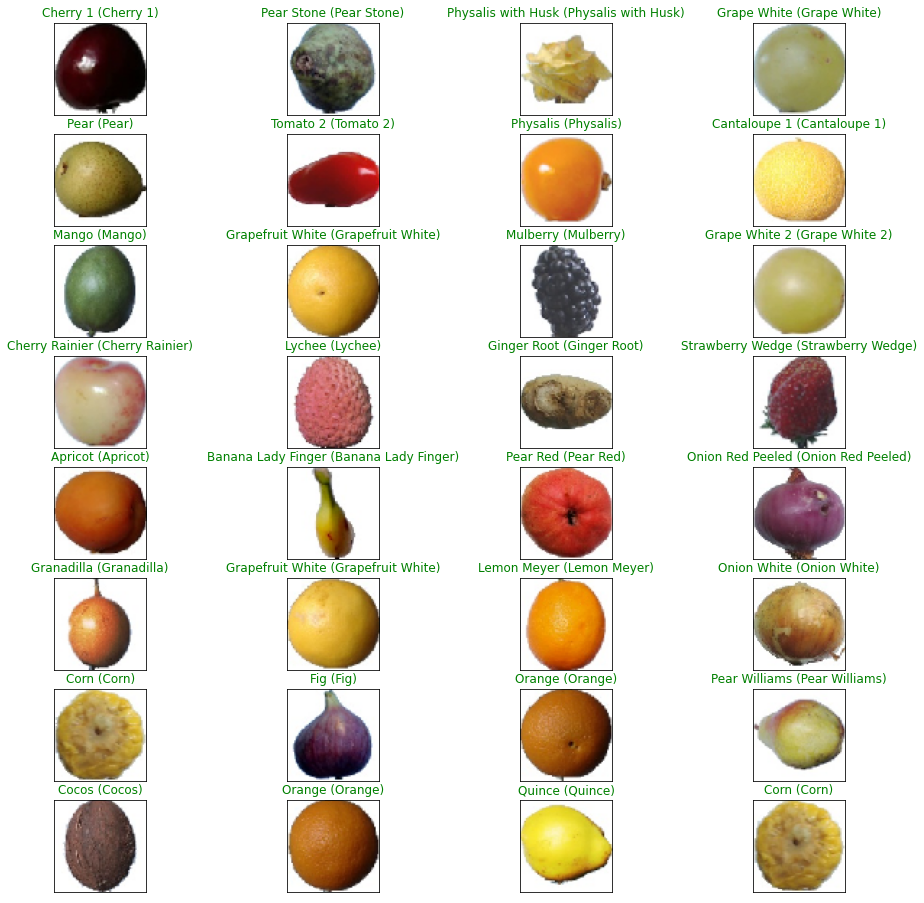

In [37]:
fig = plt.figure(figsize=(16, 16))
for i in range(len(x_test)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))
    ax.set_title("{} ({})".format(label_pred[i], label_true[i]),
                 color=("green" if label_pred[i] == label_true[i] else "red"))

In [38]:
# evaluate and print test accuracy
score = cnn2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 1.0
